## 3.0. Embedded representation of all signals with tSNE

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

import sys 
sys.path.append('..')
from src.constants import SAMPLES_DICT_3CLASS
from src.knn_load_data import (
    INDICES_SAVE_PATH_3CLASS, DTW_SAVE_PATH_3CLASS,
    load_data, prefix_data_dir, load_np_data
)

In [2]:
SAMPLES_DICT_3CLASS = prefix_data_dir(SAMPLES_DICT_3CLASS, "/mmfs1/gscratch/ml4ml/cailinw/pore_data/")

There is no need to load all data here, only the labels and samples and extra info, and the dtw_matrix. 

In [3]:
data, labels_ori, samples_ori, indices_ori, labels_key = load_data(
    samples_dict=SAMPLES_DICT_3CLASS,
    save_dir=INDICES_SAVE_PATH_3CLASS,
    load_raw_signals=False
)

dtw_mat_ori = load_np_data(f"{DTW_SAVE_PATH_3CLASS}nonorm_nosmooth_100_nopad_3class.npy")
num_classes = 3
num_samples = 1

class_names=['heart', 'adrenal', 'aorta']
num_classes=3
num_samples=[4, 4, 4]
In progress...
 
 lass heart, replicate 4/4
 lass adrenal, replicate 4/4


In [4]:
color_key_tissue = {'heart': 'tab:red', 'adrenal':'tab:orange', 'aorta':'tab:green'}

In [5]:
color_key_sample = {0: 'tab:red', 1:'tab:orange', 2:'tab:green', 3:'tab:blue'}

In [6]:
name_labels = [labels_key[lab] for lab in labels_ori]

In [7]:
perplexity = 8
early_exaggeration = 700

In [8]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components,
            metric='precomputed', 
            perplexity=perplexity,
            early_exaggeration=early_exaggeration,
            random_state=42,
            learning_rate='auto',
            square_distances=True,
            init='random'
           )
tsne_result = tsne.fit_transform(dtw_mat_ori)
tsne_result.shape

(39360, 2)

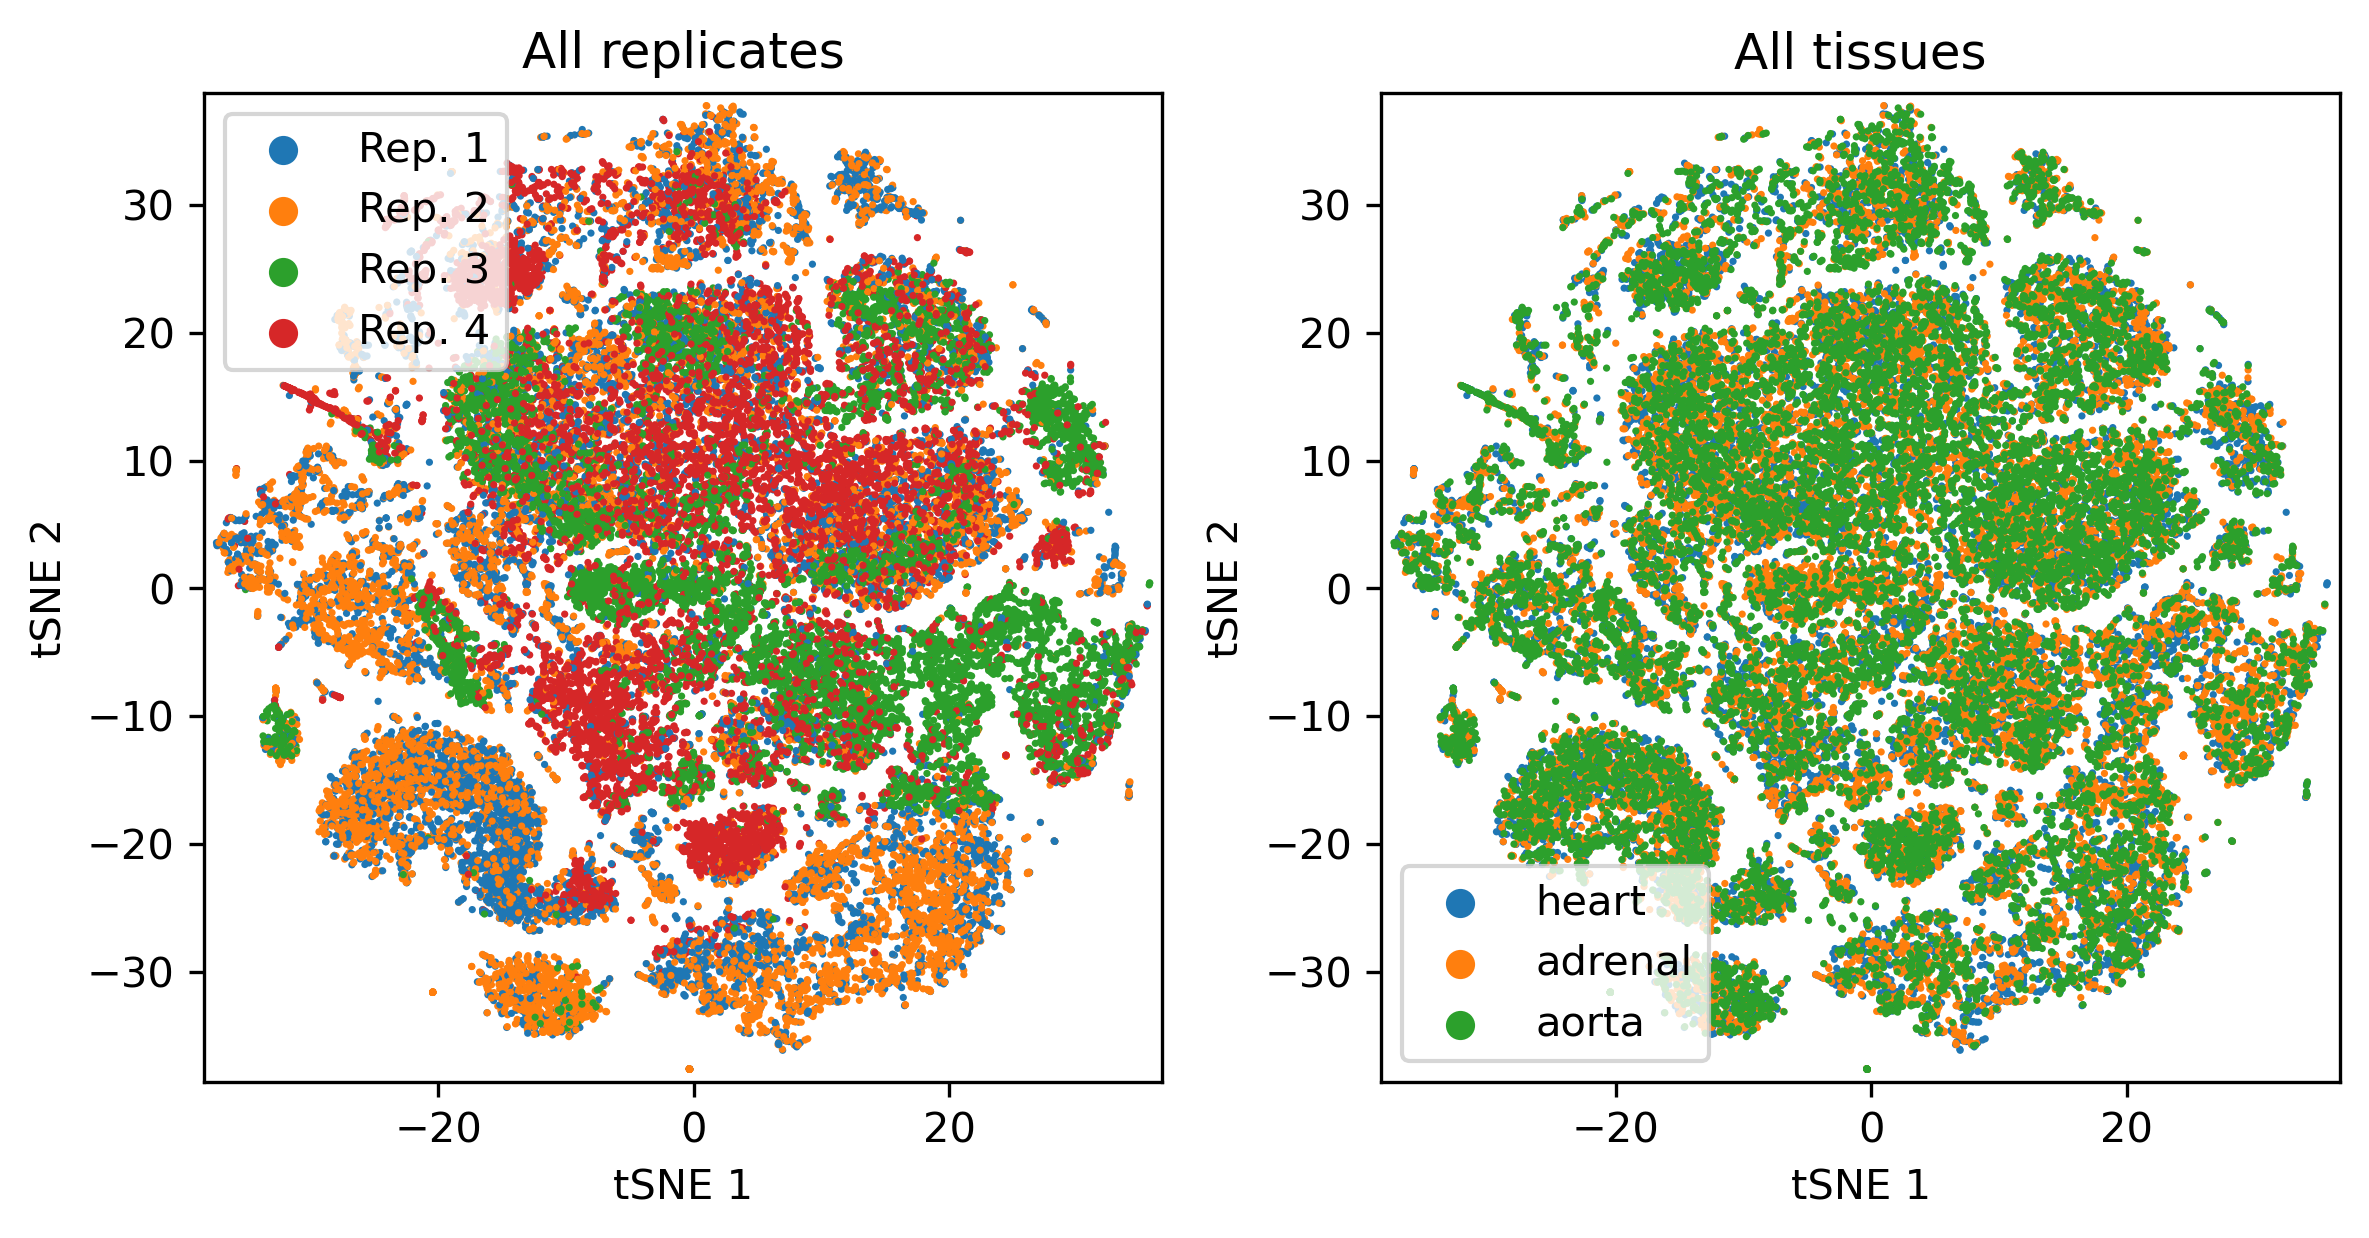

In [9]:
size = 12
lw = 0 

fig, axs = plt.subplots(1,2,figsize=(8,14), dpi=300)


tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': [f'Rep. {x+1}' for x in samples_ori]})

xlim = (tsne_result[:,0].min()-1, tsne_result[:,0].max()+1)
ylim = (tsne_result[:,1].min()-1, tsne_result[:,1].max()+1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, s=size, marker='.', linewidth=lw, ax=axs[0])
# sns.scatterplot(umap_result_df['umap_1'], umap_result_df['umap_2'], hue=umap_result_df['label'], s=size, marker='.', ax=axs[0])
axs[0].set_title(f'All replicates')
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[0].set_xlabel('tSNE 1')
axs[0].set_ylabel('tSNE 2')
axs[0].set_aspect('equal')

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': [labels_key[x] for x in labels_ori]})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, s=size, marker='.', linewidth=lw, ax=axs[1])
axs[1].set_title(f'All tissues')
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)
axs[1].set_xlabel('tSNE 1')
axs[1].set_ylabel('tSNE 2')
axs[1].set_aspect('equal')
# remove legend titles
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=labels)
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels)
plt.tight_layout()
plt.savefig('../figs/knn2.fullemb.png',dpi=300, bbox_inches='tight')
plt.show()